<h1 style='color:green' align="center">Bank customer churn prediction</h1>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# dropping unusefull features

df.drop(['RowNumber','CustomerId', 'Surname'], axis = 'columns', inplace = True)

In [4]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6105,617,France,Female,34,0,131244.65,2,1,0,183229.02,0
7224,751,Spain,Female,34,8,127095.14,2,0,0,479.54,0
3193,659,France,Female,49,1,0.00,1,1,0,116249.72,1
5278,510,Germany,Male,31,0,113688.63,1,1,0,33099.41,1
4183,486,France,Male,26,2,0.00,2,1,1,31399.40,0


In [5]:
df.shape

(10000, 11)

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.Gender.replace({'Female' : 1, 'Male':0}, inplace = True)

In [9]:
df.Gender.unique()

array([1, 0], dtype=int64)

**Using One hot encoding**

In [10]:
df1 = pd.get_dummies(data = df, columns = ['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [11]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [12]:
df1.columns.unique()

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [13]:
df1.shape

(10000, 13)

In [14]:
# NOw scaling the columns

col_to_scale = ['CreditScore','Age','Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [15]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2759,0.718,0,0.256757,0.7,0.000000,0.000000,1,0,0.797452,0,1,0,0
5039,0.620,1,0.270270,0.5,0.440700,0.333333,1,0,0.979569,0,1,0,0
6661,0.940,0,0.243243,0.4,0.000000,0.333333,1,0,0.157071,0,1,0,0
9754,0.646,0,0.297297,0.1,0.484775,0.000000,1,1,0.016237,0,0,0,1
8567,0.698,0,0.162162,0.9,0.000000,0.000000,1,1,0.540804,0,1,0,0


In [16]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [17]:
X = df1.drop('Exited', axis = 1)
y = df1.Exited

**_Train test split_**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [19]:
X_train.shape

(8000, 12)

In [20]:
X_test.shape

(2000, 12)

In [21]:
X_train[:5]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7496,0.948,0,0.418919,0.8,0.531018,0.000000,1,1,0.339401,0,1,0
7694,0.652,1,0.621622,0.4,0.466143,0.000000,1,1,0.455733,0,0,1
9248,0.558,0,0.216216,0.6,0.000000,0.333333,1,0,0.951772,0,0,1
2470,0.678,1,0.175676,0.3,0.557197,0.000000,0,1,0.603318,0,0,1
4392,0.874,0,0.445946,0.0,0.231716,0.000000,0,1,0.712702,1,0,0


In [22]:
len(X_train.columns)

12

**Building a model (ANN) with tensorflow / keras**

In [23]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
model = keras.Sequential([
    keras.layers.Dense(50, input_shape= (12,),activation = 'tanh'),
    keras.layers.Dense(40,activation = 'relu'),
    keras.layers.Dense(30,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 50)
print(model.evaluate(X_test, y_test))
    
y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
    
print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.8002
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8130
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8361
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8525
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8541
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8565
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8596
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8566
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8625
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8626

**f1 score for 1 is pretty low, whereas for 0 it is high.**

**From this it is clear that dataset is imbalanced**

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy= 'minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 20, stratify= y_sm)

In [27]:
model = keras.Sequential([
    keras.layers.Dense(50, input_shape= (12,),activation = 'tanh'),
    keras.layers.Dense(40,activation = 'relu'),
    keras.layers.Dense(30,activation = 'relu'),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 200)
    
print(model.evaluate(X_test, y_test))
    
y_preds = model.predict(X_test)
y_preds = np.round(y_preds)
    
print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/200
399/399 [==============================] - 1s 1ms/step - loss: 0.6028 - accuracy: 0.6748
Epoch 2/200
399/399 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7321
Epoch 3/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4689 - accuracy: 0.7733
Epoch 4/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4513 - accuracy: 0.7845
Epoch 5/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4401 - accuracy: 0.7925
Epoch 6/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4375 - accuracy: 0.7943
Epoch 7/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4337 - accuracy: 0.7938
Epoch 8/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4276 - accuracy: 0.7988
Epoch 9/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4251 - accuracy: 0.7998
Epoch 10/200
399/399 [==============================] - 1s 1ms/step - loss: 0.4176 - accura

399/399 [==============================] - 1s 1ms/step - loss: 0.2959 - accuracy: 0.8699
Epoch 82/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2980 - accuracy: 0.8704
Epoch 83/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2961 - accuracy: 0.8704
Epoch 84/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2960 - accuracy: 0.8695
Epoch 85/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2921 - accuracy: 0.8714
Epoch 86/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2948 - accuracy: 0.8710
Epoch 87/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2939 - accuracy: 0.8714
Epoch 88/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2920 - accuracy: 0.8733
Epoch 89/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2911 - accuracy: 0.8725
Epoch 90/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2898 - accuracy: 

399/399 [==============================] - 1s 1ms/step - loss: 0.2384 - accuracy: 0.8980
Epoch 161/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2350 - accuracy: 0.8995
Epoch 162/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2352 - accuracy: 0.9018
Epoch 163/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2356 - accuracy: 0.8998
Epoch 164/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2353 - accuracy: 0.8995
Epoch 165/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2303 - accuracy: 0.9035
Epoch 166/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2340 - accuracy: 0.8994
Epoch 167/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2353 - accuracy: 0.9009
Epoch 168/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2308 - accuracy: 0.9026
Epoch 169/200
399/399 [==============================] - 1s 1ms/step - loss: 0.2342 - a

<h2 style='color:green'> Confusion matrics </h2>

Text(69.0, 0.5, 'Truth')

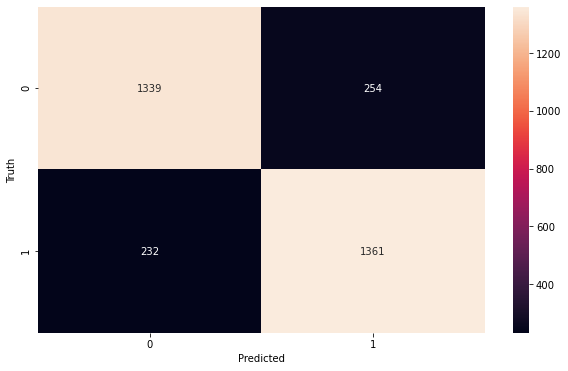

In [28]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_preds)

plt.figure(figsize=(10,6))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [29]:
Accuracy =((1318+1414) / (1318+275+197+1414))
Accuracy

0.8526841448189763

In [30]:
y_test[:10]

7030     0
6148     0
6182     0
7677     0
2287     0
2849     0
2100     0
15338    1
13362    1
2890     0
Name: Exited, dtype: int64

In [32]:
yp = model.predict(X_test)

In [33]:
y_preds = []

for element in yp:
    if element > 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [34]:
y_preds[:10]

[0, 0, 0, 0, 0, 1, 0, 1, 1, 0]